# Tilt Correction

This module will correct the tilt of the image. The pipeline performs the following operations:

- Load image without legend
- Dilate the image

In [1]:
import modules.oiplib as lib

img = lib.loadImage("../images/heptamers.tiff")

lib.showImage(img, title="Original image")

(<Figure size 1000x1000 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a6be150>)

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bd6f690>)

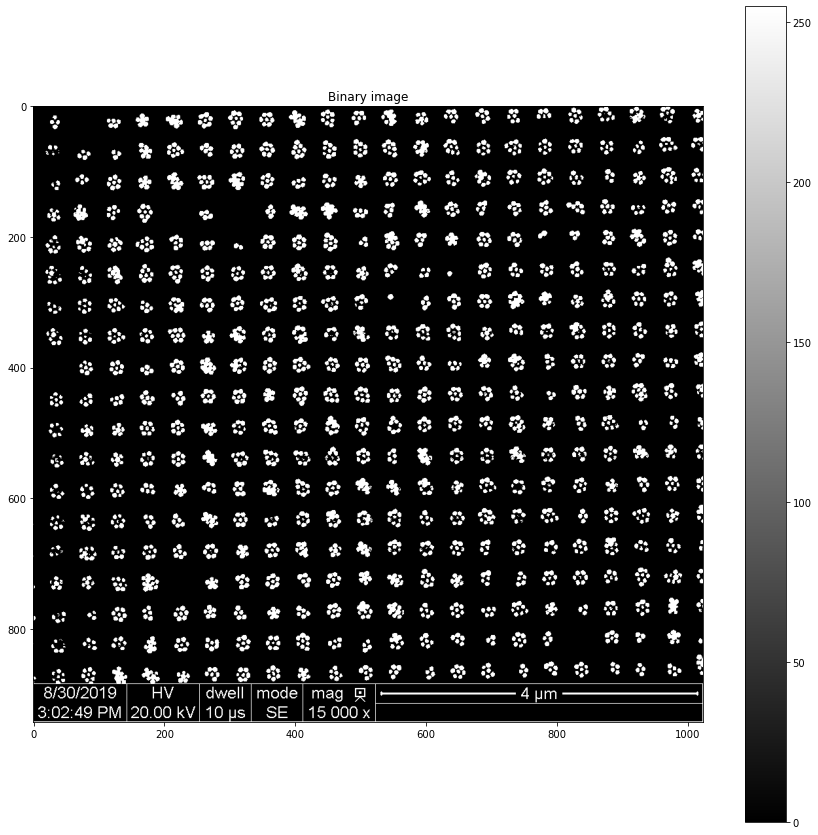

In [2]:
import scipy

imgBin = lib.threshold_binary(img, 127)

lib.showImage(imgBin * 255, title="Binary image",figsize=(15,15))

Time =  1.6960940000000004


(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bff18b0>)

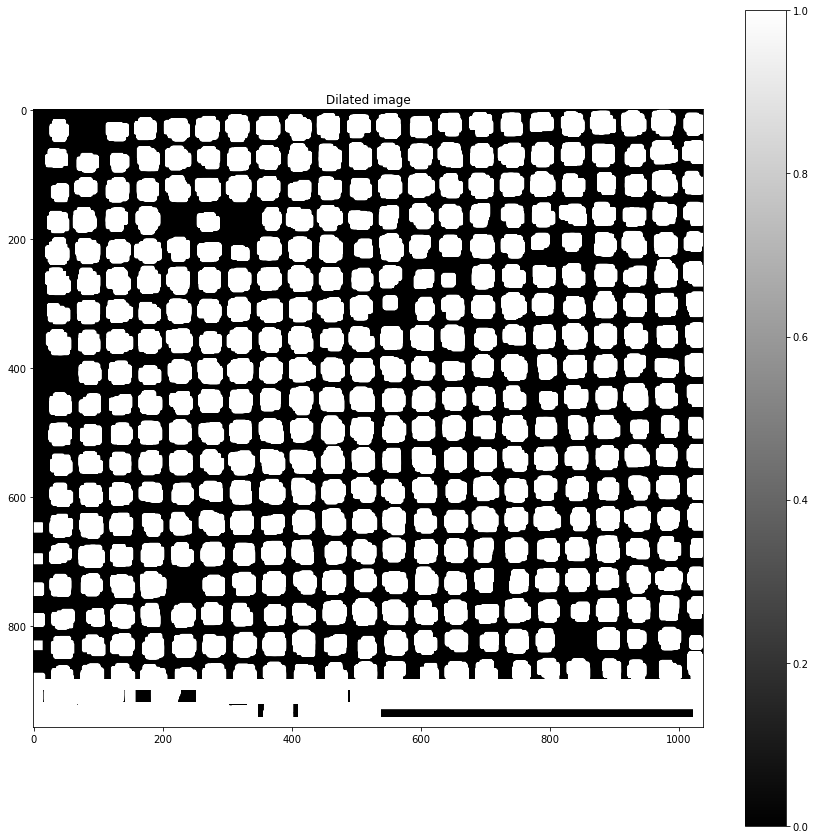

In [3]:
#struct = scipy.ndimage.generate_binary_structure(2, 1)
#struct = [[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]]

# Create structure
import numpy as np
struct = np.ones((15,15))

# Import time library for performance testing.
import time

# Start performance timer.
start = time.perf_counter()

# Convolute image and structure
imgDilated = scipy.signal.convolve2d(imgBin, struct, fillvalue=0)

# Stop performance timer
stop = time.perf_counter()

convolveTime = stop-start
print("Time = ", (convolveTime))

lib.showImage(imgDilated, vmax=1,title="Dilated image", figsize=(15,15))

(<Figure size 1080x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9cccf0>)

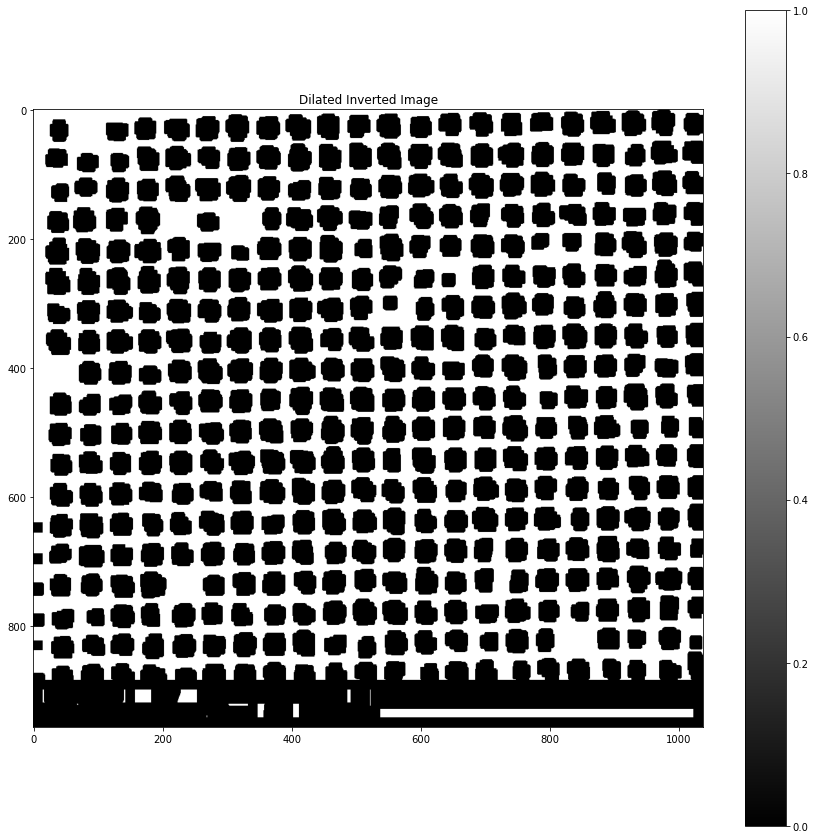

In [4]:
imgDilatedInv = np.invert(imgDilated.astype(np.bool)).astype(np.uint8)

lib.showImage(imgDilatedInv, vmax=1, title="Dilated Inverted Image", figsize=(15,15))

In [6]:
imgDilatedInverted = lib.Thinning(imgDilated)

KeyboardInterrupt: 

In [5]:
#from skimage import transform
#from skimage.draw import line

#hspace, angles, distances = transform.hough_line(imgDilatedInv)
#hspace, angles, dists = transform.hough_line_peaks(hspace, angles, distances)

lib.hough_lines(imgDilatedInv, 360, 100, 10)

MemoryError: Unable to allocate array with shape (460229, 360) and data type float64

In [ ]:
from skimage.draw import line



In [ ]:
# Import time library for performance testing.
import time

# Start performance timer.
start = time.perf_counter()

dilatedSetImg = lib.dilateSet(lib.binary2Set(imgBin), lib.createStructuringElement(5))

stop = time.perf_counter()

setTime = stop-start

print("Time = ", (setTime))

lib.showImage(lib.set2Binary(dilatedSetImg, imgBin.shape), "Dilated image", figsize=15, vmax=1);

In [ ]:
print("Time difference: ", (setTime/convolveTime))